<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Линейная регрессия</a></span><ul class="toc-item"><li><span><a href="#Визуальный-анализ" data-toc-modified-id="Визуальный-анализ-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуальный анализ</a></span></li><li><span><a href="#Регрессия" data-toc-modified-id="Регрессия-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Регрессия</a></span></li><li><span><a href="#Анализ-остатков" data-toc-modified-id="Анализ-остатков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ остатков</a></span></li></ul></li><li><span><a href="#Временные-ряды" data-toc-modified-id="Временные-ряды-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Временные ряды</a></span><ul class="toc-item"><li><span><a href="#anti-diabetic-drugs" data-toc-modified-id="anti-diabetic-drugs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>anti-diabetic-drugs</a></span></li><li><span><a href="#female-births" data-toc-modified-id="female-births-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>female-births</a></span></li><li><span><a href="#shampoo" data-toc-modified-id="shampoo-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>shampoo</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)


In [2]:
import statsmodels.api as sm # все, для работы с рядами
from scipy.special import inv_boxcox # обратное преобразование Бокса-Кокса 
from itertools import product # произведения множеств
import warnings # чтобы отключить предупреждения в Python

Баллы за задания
- 1  Линейная регрессия
    - 1.1  Визуальный анализ (25 баллов)
    - 1.2  Регрессия (15 баллов)
    - 1.3  Анализ остатков (15 баллов)
- 2  Временные ряды
    - 2.1  anti-diabetic-drugs (15 баллов)
    - 2.2  female-births (15 баллов)
    - 2.3  shampoo (15 баллов)

In [3]:
!curl https://raw.githubusercontent.com/ilyaaaaaaaa/stat_HSE_DPO_21-Fall/main/data/auto.csv -o auto.csv
!curl https://raw.githubusercontent.com/ilyaaaaaaaa/stat_HSE_DPO_21-Fall/main/data/anti-diabetic-drugs.csv -o anti-diabetic-drugs.csv
!curl https://raw.githubusercontent.com/ilyaaaaaaaa/stat_HSE_DPO_21-Fall/main/data/female-births.csv -o female-births.csv
!curl https://raw.githubusercontent.com/ilyaaaaaaaa/stat_HSE_DPO_21-Fall/main/data/shampoo.csv -o shampoo.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 18276  100 18276    0     0  47488      0 --:--:-- --:--:-- --:--:-- 47593
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4670  100  4670    0     0  11883      0 --:--:-- --:--:-- --:--:-- 11882
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  6220  100  6220    0     0  16613      0 --:

# Линейная регрессия

В файле auto.csv находятся данные, которые описывают характеристики 392 автомобилей. 

А именно, в данных вы найдете следующие столбцы:
1. mpg — расход топлива (миль/галлон);
2. cylinders — количество цилиндров мотора;
3. displacement — объем мотора (куб. дюйм);
4. horsepower — мощность мотора (в лошадиных силах);
5. weight — вес (тысяч фунтов);
6. acceleration — время, за которое автомобиль разгоняется до 60 mph; 
7. year — год автомобиля (по модулю 100);
8. origin — место производства (1 — Америка, 2 — Европа, 3 — Япония); 
9. name — название автомобиля.

Задания
- Визуально проанализируйте взаимосвязь между расходом топлива и остальными переменными
    - базовый код написан 
    - нужно проанализировать графики и прокомментировать наблюдения - обратите внимание на вопросы
    - по усмотрению можно сделать дополнительный анализ 
- Подготовьте данные для построения линейной регрессии
---
- Постройте линейную регрессионную модель для предсказания расхода топлива по этим данным
- Интерпретируйте значения коэффициентов регрессии (влияние каждого признака на отклик). Какие признаки влияют на расход топлива и как?
---
- Проанализируйте остатки и проверьте корректность модели


In [4]:
df = pd.read_csv('auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Визуальный анализ

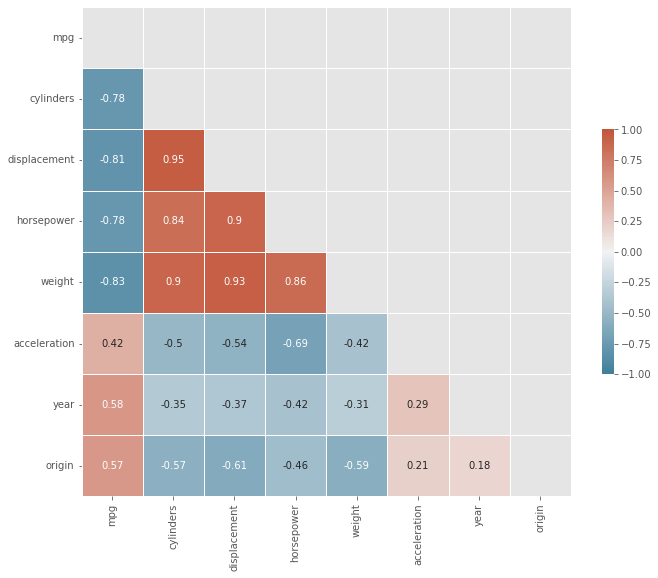

In [5]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot=True, 
            center=0, vmin=-1, vmax=1,
           )
plt.show()

- Стоит ли использовать все признаки?

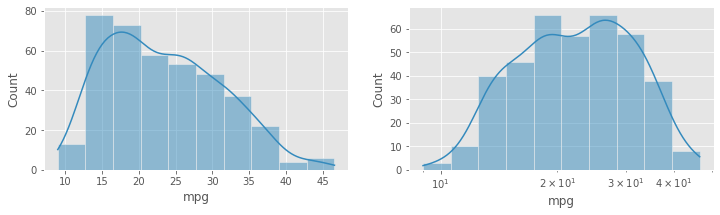

In [6]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.histplot(df['mpg'], bins=10, kde=True)
plt.subplot(122)
sns.histplot(df['mpg'], bins=10, log_scale=True, kde=True);


- Нужно ли логарифмирование?

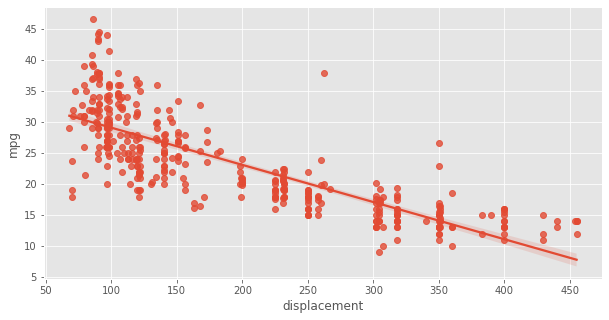

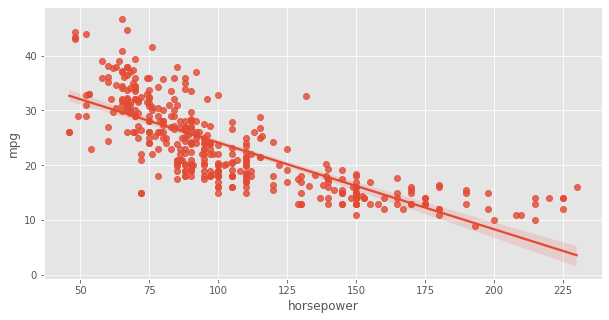

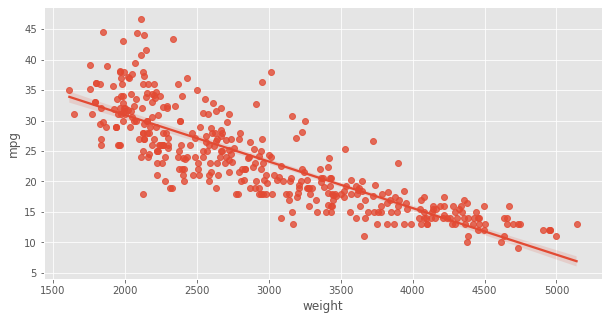

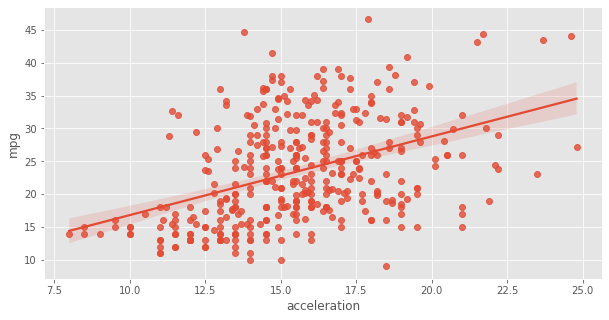

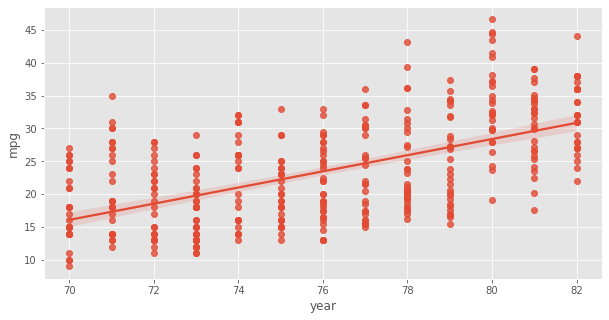

In [7]:
for x in ['displacement','horsepower','weight','acceleration','year']:
    sns.regplot(data=df, x=x, y='mpg',  
#                 logx=True
               )
    plt.show()

- Стоит ли попробовать логарифмировать некоторые признаки?

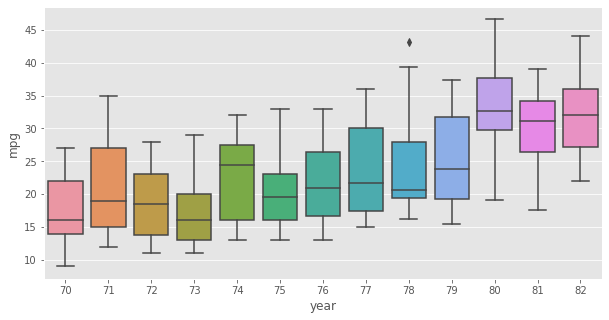

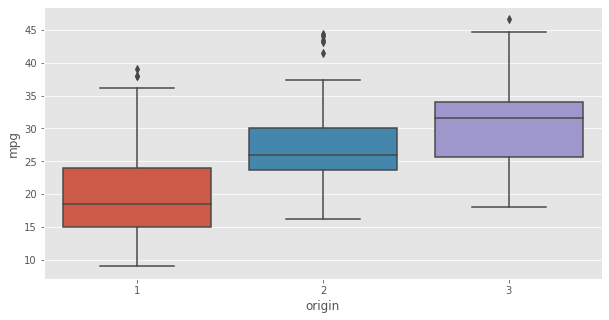

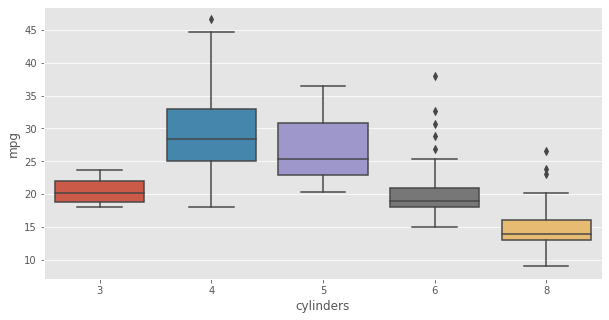

In [8]:
for x in ['year','origin','cylinders']:
    sns.boxplot(data=df, x=x, y='mpg');
    plt.show()

- Все ли признаки действительно числовые?

## Регрессия

## Анализ остатков

# Временные ряды



Есть 3 датасета с временными рядами
- В `anti-diabetic-drugs.csv` содержатся данные о ежемесячных продажах антидиабетических препаратов в Австралии с 1992 по 2008 год. 
- В `female-births.csv` содержатся данные о количестве новорожденных детей женского пола в 1959 году в Калифорнии. 
- В `shampoo.csv` содержатся данные о ежемесячных продажах шампуня за трехлетний период. 


Проанализируйте каждый из этих рядов и постройте модель SARIMA, чтобы сделать прогноз
- для `anti-diabetic-drugs.csv` - на один год вперед
- для `female-births.csv` - на один месяц вперед
- для `shampoo.csv` - на 3 месяца вперед

Для этого 
- рассмотрите необходимость стабилизации дисперссии и необходимость дифференцирования ряда
- проанализируйте ACF и PACF и подберите гиперпараметры SARIMA
- обучите модель SARIMA с наилучшими гиперпараметрами
- проанализируйте остатки модели

Ваши решения необходимо сопроводить краткими комментариями и выводами, которые Вы сделали на основе анализа. Не забывайте о построении графиков! 

Ориентируйтесь на пример анализа временного ряда в ноутбуке с последнего занятия.

## anti-diabetic-drugs

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


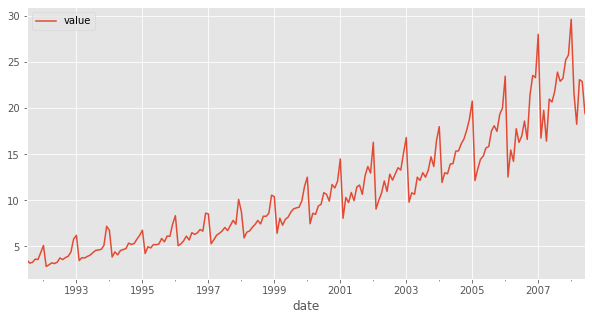

In [9]:
df = pd.read_csv('anti-diabetic-drugs.csv', index_col='date', parse_dates=['date'])
df.plot();
df.head()

## female-births

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


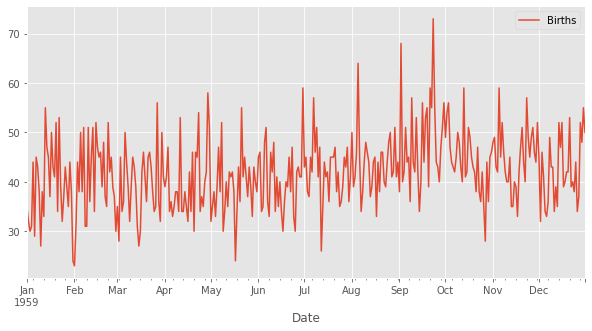

In [10]:
df = pd.read_csv('female-births.csv', index_col=['Date'], parse_dates=['Date'])
df.plot();
df.head()

## shampoo

,Sales
Date,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


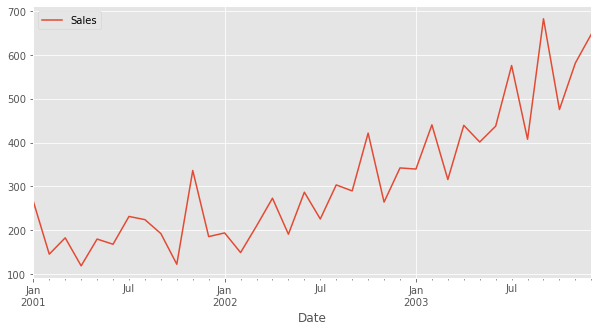

In [11]:
df = pd.read_csv('shampoo.csv')
df['Date'] = pd.to_datetime('200'+df['Month']+'-01')
df = df.set_index('Date').drop('Month',axis=1)
df.plot();
df.head()